<a href="https://colab.research.google.com/github/ruwanwija/Research-Models/blob/main/Rain_Prediction_Final_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic Regression for Rain Model

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# 1. Load the Iris dataset

In [ ]:
file_path = 'Rain.csv'
df = pd.read_csv(file_path)

# Inspect the dataset (optional)
print(df.head())

   temperature_2m_max  temperature_2m_min  temperature_2m_mean  \
0                29.6                20.8                 25.4   
1                29.6                22.6                 25.4   
2                29.1                21.9                 24.9   
3                28.4                19.9                 24.2   
4                27.7                19.5                 23.6   

   apparent_temperature_max  apparent_temperature_min  \
0                      35.5                      23.7   
1                      35.2                      26.7   
2                      36.2                      26.2   
3                      33.1                      22.6   
4                      30.7                      22.3   

   apparent_temperature_mean  shortwave_radiation_sum  rain_sum  \
0                       29.8                    20.67       0.1   
1                       30.2                    17.50       0.9   
2                       29.9                    16.58      

In [ ]:
X = df.drop('rain_status',axis=1)
y = df['rain_status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)

In [ ]:
model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=200, multi_class='multinomial')

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.94
Confusion Matrix:
[[  4   0   0   0   0   3]
 [  0 510   0  17   0   1]
 [  0   0   0  15   8   0]
 [  0   3   3 285   2   0]
 [  0   0   0   0  98   0]
 [  0   5   0   0   0  30]]
Classification Report:
              precision    recall  f1-score   support

Extreme Rain       1.00      0.57      0.73         7
       Heavy       0.98      0.97      0.98       528
       Light       0.00      0.00      0.00        23
    Moderate       0.90      0.97      0.93       293
          No       0.91      1.00      0.95        98
  Very Heavy       0.88      0.86      0.87        35

    accuracy                           0.94       984
   macro avg       0.78      0.73      0.74       984
weighted avg       0.92      0.94      0.93       984



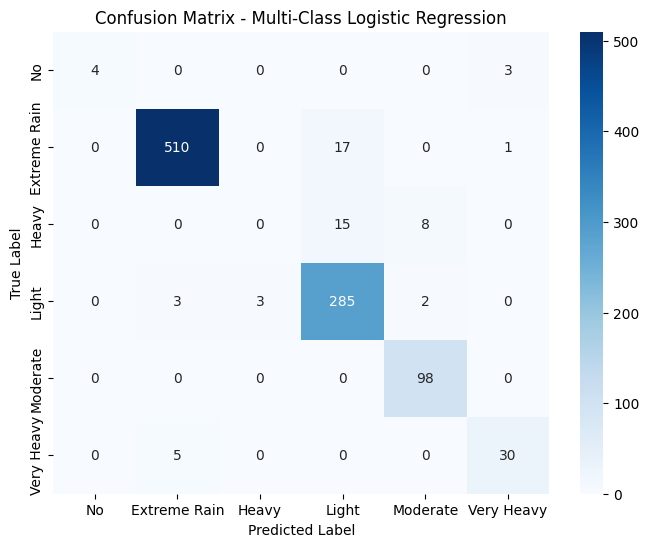

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['No','Extreme Rain', 'Heavy', 'Light', 'Moderate', 'Very Heavy']
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.title('Confusion Matrix - Multi-Class Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Logistic Regression with cross validation

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# 1. Load the Iris dataset

In [ ]:
file_path = 'Rain.csv'
df = pd.read_csv(file_path)

# Inspect the dataset (optional)
print(df.head())

   temperature_2m_max  temperature_2m_min  temperature_2m_mean  \
0                29.6                20.8                 25.4   
1                29.6                22.6                 25.4   
2                29.1                21.9                 24.9   
3                28.4                19.9                 24.2   
4                27.7                19.5                 23.6   

   apparent_temperature_max  apparent_temperature_min  \
0                      35.5                      23.7   
1                      35.2                      26.7   
2                      36.2                      26.2   
3                      33.1                      22.6   
4                      30.7                      22.3   

   apparent_temperature_mean  shortwave_radiation_sum  rain_sum  \
0                       29.8                    20.67       0.1   
1                       30.2                    17.50       0.9   
2                       29.9                    16.58      

# 2. Initialize the Logistic Regression model

In [ ]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)

# 3. Create a pipeline with scaling and the logistic regression model

In [ ]:
pipeline = make_pipeline(StandardScaler(), model)

# 4. Define the number of folds

In [ ]:
k = 5

# 5. Initialize StratifiedKFold

In [ ]:
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# 6. Perform cross-validation with multiple metrics

In [ ]:
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(pipeline, X, y, cv=skf, scoring=scoring)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

# 7. Display cross-validation results

In [ ]:
print("Cross-Validation Results:")
for metric in scoring:
    scores = cv_results[f'test_{metric}']
    print(f"{metric.capitalize()}: {scores.mean():.2f} (+/- {scores.std():.2f})")

Cross-Validation Results:
Accuracy: 0.96 (+/- 0.01)
Precision_macro: 0.96 (+/- 0.01)
Recall_macro: 0.86 (+/- 0.05)
F1_macro: 0.89 (+/- 0.04)


# 8. Define the parameter grid for GridSearchCV

In [ ]:
param_grid = {
    'logisticregression__C': [0.1, 1, 10, 100],
    'logisticregression__solver': ['lbfgs', 'saga'],
    'logisticregression__max_iter': [200, 500, 1000]
}

# 9. Initialize GridSearchCV

In [ ]:
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# 10. Perform grid search

In [ ]:
grid_search.fit(X, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=200,
                                                           multi_class='multinomial'))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.1, 1, 10, 100],
                         'logisticregression__max_iter': [200, 500, 1000],
                         'logisticregression__solver': ['lbfgs', 'saga']},
             scoring='accuracy', verbose=1)

# 11. Display the best parameters and score

In [ ]:
print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.2f}")


Best Parameters: {'logisticregression__C': 100, 'logisticregression__max_iter': 200, 'logisticregression__solver': 'lbfgs'}
Best Cross-Validation Accuracy: 0.99


# 12. Retrieve the best estimator

In [ ]:
best_model = grid_search.best_estimator_

# 13. Perform cross-validation with the best model

In [ ]:
best_cv_scores = cross_val_score(best_model, X, y, cv=skf, scoring='accuracy')
print(f"\nBest Model Cross-Validation Accuracy: {best_cv_scores.mean():.2f} (+/- {best_cv_scores.std():.2f})")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi


Best Model Cross-Validation Accuracy: 0.99 (+/- 0.00)


#K-NN Algorithm

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# 1. Load the dataset

In [ ]:
file_path = 'Rain.csv'
df = pd.read_csv(file_path)

# Inspect the dataset (optional)
print(df.head())

   temperature_2m_max  temperature_2m_min  temperature_2m_mean  \
0                29.6                20.8                 25.4   
1                29.6                22.6                 25.4   
2                29.1                21.9                 24.9   
3                28.4                19.9                 24.2   
4                27.7                19.5                 23.6   

   apparent_temperature_max  apparent_temperature_min  \
0                      35.5                      23.7   
1                      35.2                      26.7   
2                      36.2                      26.2   
3                      33.1                      22.6   
4                      30.7                      22.3   

   apparent_temperature_mean  shortwave_radiation_sum  rain_sum  \
0                       29.8                    20.67       0.1   
1                       30.2                    17.50       0.9   
2                       29.9                    16.58      

# 2. Create a pipeline with scaling and K-NN classifier

In [ ]:
pipeline = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

# 3. Define the number of folds for cross-validation

In [ ]:
k_folds = 5

# 4. Initialize StratifiedKFold

In [ ]:
strat_k_fold = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# 5. Perform cross-validation

In [ ]:
cv_scores = cross_val_score(pipeline, X, y, cv=strat_k_fold, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print(f"Mean Accuracy: {cv_scores.mean():.2f}")
print(f"Standard Deviation: {cv_scores.std():.2f}\n")

Cross-Validation Accuracy Scores: [0.83130081 0.84842319 0.83926755 0.83926755 0.81993896]
Mean Accuracy: 0.84
Standard Deviation: 0.01



# 6. Define the parameter grid for GridSearchCV

In [ ]:
param_grid = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7, 9],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__metric': ['euclidean', 'manhattan']
}

# 7. Initialize GridSearchCV

In [ ]:
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=strat_k_fold,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# 8. Perform grid search

In [ ]:
grid_search.fit(X, y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__metric': ['euclidean',
                                                          'manhattan'],
                         'kneighborsclassifier__n_neighbors': [3, 5, 7, 9],
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']},
             scoring='accuracy', verbose=1)

# 9. Display the best parameters and score

In [ ]:
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.2f}\n")

Best Parameters: {'kneighborsclassifier__metric': 'manhattan', 'kneighborsclassifier__n_neighbors': 9, 'kneighborsclassifier__weights': 'distance'}
Best Cross-Validation Accuracy: 0.86



# 10. Retrieve the best estimator

In [ ]:
best_model = grid_search.best_estimator_

# 11. Perform cross-validation with the best model

In [ ]:
best_cv_scores = cross_val_score(best_model, X, y, cv=strat_k_fold, scoring='accuracy')
print(f"Best Model Cross-Validation Accuracy: {best_cv_scores.mean():.2f} (+/- {best_cv_scores.std():.2f})\n")

Best Model Cross-Validation Accuracy: 0.86 (+/- 0.01)



# 12. Fit the best model on the entire dataset

In [ ]:
best_model.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=9,
                                      weights='distance'))])

# 13. Predict on the same dataset (for demonstration)

In [ ]:
y_pred = best_model.predict(X_test)

# 14. Generate the confusion matrix

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix, "\n")

Confusion Matrix:
[[  7   0   0   0   0]
 [  0 528   0   0   0]
 [  0   0 121   0   0]
 [  0   0   0 293   0]
 [  0   0   0   0  35]] 



# 15. Generate a classification report

In [ ]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

Extreme Rain       1.00      1.00      1.00         7
       Heavy       1.00      1.00      1.00       528
       Light       1.00      1.00      1.00       121
    Moderate       1.00      1.00      1.00       293
  Very Heavy       1.00      1.00      1.00        35

    accuracy                           1.00       984
   macro avg       1.00      1.00      1.00       984
weighted avg       1.00      1.00      1.00       984



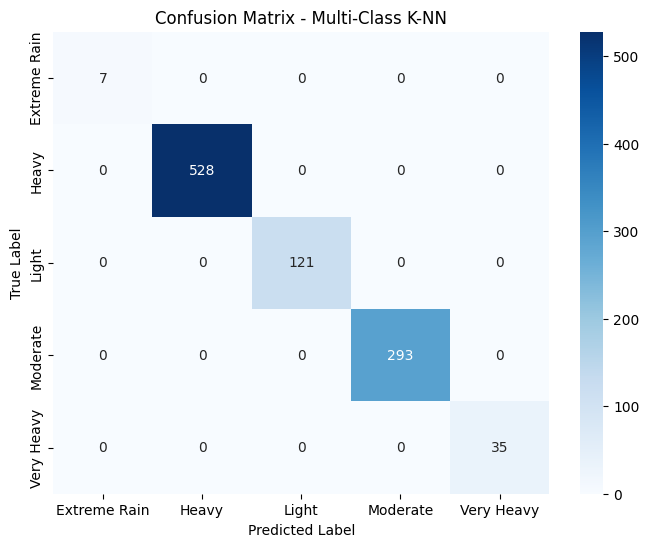

In [ ]:
target_names = ['Extreme Rain', 'Heavy', 'Light', 'Moderate', 'Very Heavy']
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.title('Confusion Matrix - Multi-Class K-NN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#Naive Bayes Algorithm

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset

In [ ]:
file_path = 'Rain.csv'
df = pd.read_csv(file_path)

# Inspect the dataset (optional)
print(df.head())

   temperature_2m_max  temperature_2m_min  temperature_2m_mean  \
0                29.6                20.8                 25.4   
1                29.6                22.6                 25.4   
2                29.1                21.9                 24.9   
3                28.4                19.9                 24.2   
4                27.7                19.5                 23.6   

   apparent_temperature_max  apparent_temperature_min  \
0                      35.5                      23.7   
1                      35.2                      26.7   
2                      36.2                      26.2   
3                      33.1                      22.6   
4                      30.7                      22.3   

   apparent_temperature_mean  shortwave_radiation_sum  rain_sum  \
0                       29.8                    20.67       0.1   
1                       30.2                    17.50       0.9   
2                       29.9                    16.58      

# 3. Define the number of folds for cross-validation

In [ ]:
X = df.drop('rain_status', axis=1)  # Features
y = df['rain_status']

In [ ]:
k_folds = 5

# 4. Initialize StratifiedKFold

In [ ]:
strat_k_fold = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# 5. Initialize the Gaussian Naive Bayes model

In [ ]:
nb_model = GaussianNB()

# Split the data into training and testing sets

In [ ]:
strat_k_fold = StratifiedKFold(n_splits=5)

In [ ]:
for train_index, test_index in strat_k_fold.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    nb_model.fit(X_train, y_train)
    y_pred = nb_model.predict(X_test)

    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)

KeyError: "None of [Index([ 833,  958,  959,  960,  963,  965,  966,  967,  968,  969,\n       ...\n       4906, 4907, 4908, 4909, 4910, 4911, 4912, 4913, 4914, 4915],\n      dtype='int64', length=3932)] are in the [columns]"

# Fit the model on the training data

In [ ]:
nb_model.fit(X_train, y_train)

NameError: name 'X_train' is not defined

# 6. Perform cross-validation to compute accuracy scores

In [ ]:
cv_scores = cross_val_score(nb_model, X, y, cv=strat_k_fold, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print(f"Mean Accuracy: {cv_scores.mean():.2f}")
print(f"Standard Deviation: {cv_scores.std():.2f}\n")

Cross-Validation Accuracy Scores: [0.90142276 0.90946083 0.90844354 0.89623601 0.92065107]
Mean Accuracy: 0.91
Standard Deviation: 0.01



# 7. Generate cross-validated predictions

In [ ]:
y_pred = cross_val_predict(nb_model, X_test, y_test, cv=strat_k_fold)

# 8. Create the Classification Report

In [ ]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

Extreme Rain       0.56      0.71      0.62         7
       Heavy       0.96      0.90      0.93       528
       Light       0.93      0.93      0.93       121
    Moderate       0.86      0.91      0.89       293
  Very Heavy       0.62      0.86      0.72        35

    accuracy                           0.90       984
   macro avg       0.79      0.86      0.82       984
weighted avg       0.91      0.90      0.91       984



In [ ]:
conf_mat = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.title('Confusion Matrix - Multi-Class SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

NameError: name 'confusion_matrix' is not defined

# Support Vector Machine

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Load the 'rain' dataset

In [ ]:
file_path = 'Rain.csv'
df = pd.read_csv(file_path)

# Inspect the dataset (optional)
print(df.head())

   temperature_2m_max  temperature_2m_min  temperature_2m_mean  \
0                29.6                20.8                 25.4   
1                29.6                22.6                 25.4   
2                29.1                21.9                 24.9   
3                28.4                19.9                 24.2   
4                27.7                19.5                 23.6   

   apparent_temperature_max  apparent_temperature_min  \
0                      35.5                      23.7   
1                      35.2                      26.7   
2                      36.2                      26.2   
3                      33.1                      22.6   
4                      30.7                      22.3   

   apparent_temperature_mean  shortwave_radiation_sum  rain_sum  \
0                       29.8                    20.67       0.1   
1                       30.2                    17.50       0.9   
2                       29.9                    16.58      

# 2. Data Preprocessing

# 3.1 Handle Missing Values

In [ ]:
print("Missing Values in Each Column:")
print(df.isnull().sum(), "\n")

Missing Values in Each Column:
temperature_2m_max            0
temperature_2m_min            0
temperature_2m_mean           0
apparent_temperature_max      0
apparent_temperature_min      0
apparent_temperature_mean     0
shortwave_radiation_sum       0
rain_sum                      0
precipitation_hours           0
windspeed_10m_max             0
windgusts_10m_max             0
winddirection_10m_dominant    0
et0_fao_evapotranspiration    0
rain_intensity                0
rain_status                   0
dtype: int64 



# For simplicity, drop rows with missing values

In [ ]:
rain = df.dropna()

# 3.2 Encode Categorical Variables

In [ ]:
categorical_cols = rain.select_dtypes(include=['object']).columns
print(f"Categorical Columns: {categorical_cols}\n")

Categorical Columns: Index(['rain_status'], dtype='object')



# Initialize LabelEncoder

In [ ]:
le = LabelEncoder()


# Encode categorical columns

In [ ]:
for col in categorical_cols:
    rain[col] = le.fit_transform(rain[col])

# 3.3 Define Features and Target

In [ ]:
X = rain.drop('rain_status', axis=1)
y = rain['rain_status']

# 4. Implementing Multi-Class SVM with Cross-Validation

# 4.1 Define the number of folds

In [ ]:
k_folds = 5

# 4.2 Initialize StratifiedKFold

In [ ]:
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# 4.3 Create a Pipeline with Scaling and SVM

In [ ]:
pipeline = make_pipeline(
    StandardScaler(),
    SVC(kernel='rbf', decision_function_shape='ovr', random_state=42)
)

# 4.4 Perform Cross-Validated Predictions

In [ ]:
y_pred = cross_val_predict(pipeline, X, y, cv=skf)

# 5. Generating the Classification Report

In [ ]:
target_names = ['No', 'Extreme Rain', 'Heavy', 'Light', 'Moderate', 'Very Heavy']

# 5.2 Generate Classification Report

In [ ]:
report = classification_report(y, y_pred, target_names=target_names, output_dict=True)

# Convert the classification report to a DataFrame

In [ ]:
report_df = pd.DataFrame(report).transpose()

# Display the label-wise classification report

In [ ]:
print("Label-wise Classification Report:")
print(report_df)

Label-wise Classification Report:
              precision    recall  f1-score      support
No             0.909091  0.476190  0.625000    21.000000
Extreme Rain   0.970881  0.942007  0.956226  2690.000000
Heavy          0.500000  0.007463  0.014706   134.000000
Light          0.848542  0.945621  0.894456  1416.000000
Moderate       0.859712  0.979508  0.915709   488.000000
Very Heavy     0.899371  0.856287  0.877301   167.000000
accuracy       0.916395  0.916395  0.916395     0.916395
macro avg      0.831266  0.701180  0.713900  4916.000000
weighted avg   0.909079  0.916395  0.904652  4916.000000


# 6. Visualizing the Confusion Matrix

In [ ]:
conf_mat = confusion_matrix(y, y_pred)

# 6.2 Plot Confusion Matrix

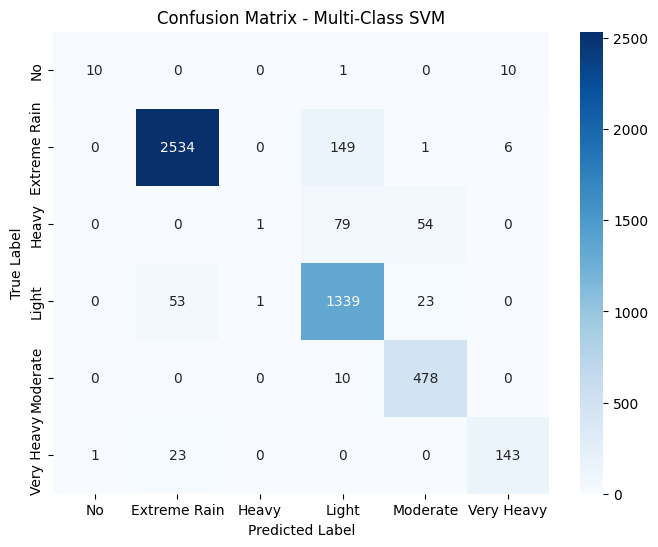

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.title('Confusion Matrix - Multi-Class SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#Decision Tree


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_predict, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the 'rain' dataset

In [ ]:
file_path = 'Rain.csv'
df = pd.read_csv(file_path)

# Inspect the dataset (optional)
print(df.head())

   temperature_2m_max  temperature_2m_min  temperature_2m_mean  \
0                29.6                20.8                 25.4   
1                29.6                22.6                 25.4   
2                29.1                21.9                 24.9   
3                28.4                19.9                 24.2   
4                27.7                19.5                 23.6   

   apparent_temperature_max  apparent_temperature_min  \
0                      35.5                      23.7   
1                      35.2                      26.7   
2                      36.2                      26.2   
3                      33.1                      22.6   
4                      30.7                      22.3   

   apparent_temperature_mean  shortwave_radiation_sum  rain_sum  \
0                       29.8                    20.67       0.1   
1                       30.2                    17.50       0.9   
2                       29.9                    16.58      

# 2. Data Preprocessing

# 2.1 Handle Missing Values

In [ ]:
print("Missing Values in Each Column:")
print(rain.isnull().sum(), "\n")

Missing Values in Each Column:
temperature_2m_max            0
temperature_2m_min            0
temperature_2m_mean           0
apparent_temperature_max      0
apparent_temperature_min      0
apparent_temperature_mean     0
shortwave_radiation_sum       0
rain_sum                      0
precipitation_hours           0
windspeed_10m_max             0
windgusts_10m_max             0
winddirection_10m_dominant    0
et0_fao_evapotranspiration    0
rain_intensity                0
rain_status                   0
dtype: int64 



# For simplicity, drop rows with missing values

In [ ]:
rain = df.dropna()

# 2.2 Encode Categorical Variables

In [ ]:
categorical_cols = rain.select_dtypes(include=['object', 'category']).columns
print(f"Categorical Columns: {categorical_cols}\n")

Categorical Columns: Index(['rain_status'], dtype='object')



# Initialize LabelEncoder

In [ ]:
le = LabelEncoder()

# OneHotEncoder for nominal categories

In [ ]:
rain = pd.get_dummies(rain, columns=categorical_cols)

# 2.3 Define Features and Target

In [ ]:
X = df.drop('rain_status', axis=1)
y = df['rain_status']

# 3. Implementing Multi-Class Decision Tree with Cross-Validation

# 3.1 Define the number of folds

In [ ]:
k_folds = 5

# 3.2 Initialize StratifiedKFold

In [ ]:
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# 3.3 Create a Pipeline with Decision Tree

In [ ]:
pipeline = make_pipeline(
    DecisionTreeClassifier(random_state=42)
)

# 3.4 Perform Cross-Validated Predictions

In [ ]:
y_pred = cross_val_predict(pipeline, X, y, cv=skf)

# 5. Define Target Names (use your actual labels)

In [ ]:
target_names = ['Extreme Rain', 'Heavy', 'Light', 'Moderate', 'Very Heavy']

# 6. Generate Classification Report and Convert to DataFrame

In [ ]:
report = classification_report(y, y_pred, target_names=target_names, output_dict=True)

# Convert the classification report to a DataFrame

In [ ]:
report_df = pd.DataFrame(report).transpose()

# Display the label-wise classification report

In [ ]:
print("Label-wise Classification Report:")
print(report_df)

Label-wise Classification Report:
              precision  recall  f1-score  support
Extreme Rain        1.0     1.0       1.0     21.0
Heavy               1.0     1.0       1.0   2690.0
Light               1.0     1.0       1.0    622.0
Moderate            1.0     1.0       1.0   1416.0
Very Heavy          1.0     1.0       1.0    167.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0   4916.0
weighted avg        1.0     1.0       1.0   4916.0


# 5. Visualizing the Confusion Matrix

# 5.1 Compute Confusion Matrix

In [ ]:
conf_mat = confusion_matrix(y, y_pred)

# 5.2 Plot Confusion Matrix

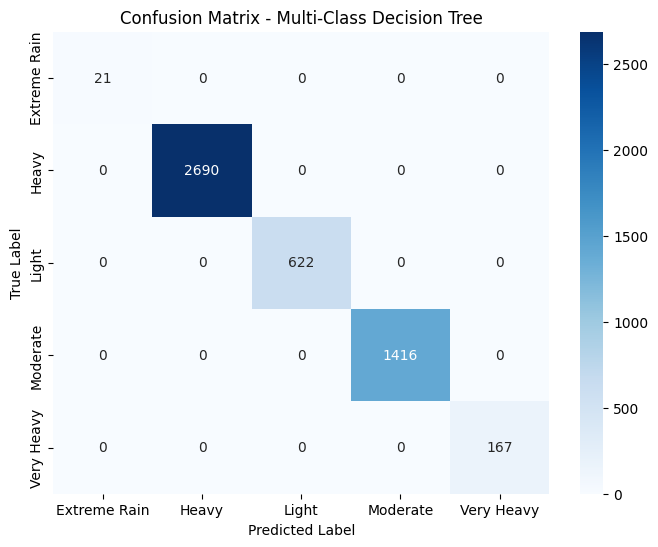

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.title('Confusion Matrix - Multi-Class Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 6. Hyperparameter Tuning with Cross-Validation

In [ ]:
from sklearn.model_selection import GridSearchCV

# 6.1 Define the parameter grid

In [ ]:
param_grid = {
    'decisiontreeclassifier__max_depth': [None, 5, 10, 20],
    'decisiontreeclassifier__min_samples_split': [2, 5, 10],
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 4],
    'decisiontreeclassifier__criterion': ['gini', 'entropy']
}

# 6.2 Initialize GridSearchCV

In [ ]:
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# 6.3 Fit GridSearchCV

In [ ]:
grid_search.fit(X, y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('decisiontreeclassifier',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': [None, 5, 10, 20],
                         'decisiontreeclassifier__min_samples_leaf': [1, 2, 4],
                         'decisiontreeclassifier__min_samples_split': [2, 5,
                                                                       10]},
             scoring='accuracy', verbose=1)

# 6.4 Display the best parameters and score

In [ ]:
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.2f}")

Best Parameters: {'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': None, 'decisiontreeclassifier__min_samples_leaf': 1, 'decisiontreeclassifier__min_samples_split': 2}
Best Cross-Validation Accuracy: 1.00


# 6.5 Use the best estimator to make predictions

In [ ]:
best_model = grid_search.best_estimator_
y_pred_best = cross_val_predict(best_model, X, y, cv=skf)

# 6.6 Generate Classification Report for the best model

In [ ]:
report_best = classification_report(y, y_pred_best, target_names=target_names)
print("Classification Report for Best Model:")
print(report_best)

Classification Report for Best Model:
              precision    recall  f1-score   support

Extreme Rain       1.00      1.00      1.00        21
       Heavy       1.00      1.00      1.00      2690
       Light       1.00      1.00      1.00       622
    Moderate       1.00      1.00      1.00      1416
  Very Heavy       1.00      1.00      1.00       167

    accuracy                           1.00      4916
   macro avg       1.00      1.00      1.00      4916
weighted avg       1.00      1.00      1.00      4916



# 6.7 Generate Confusion Matrix for the best model

In [ ]:
conf_mat_best = confusion_matrix(y, y_pred_best)

# 6.8 Plot Confusion Matrix for the best model

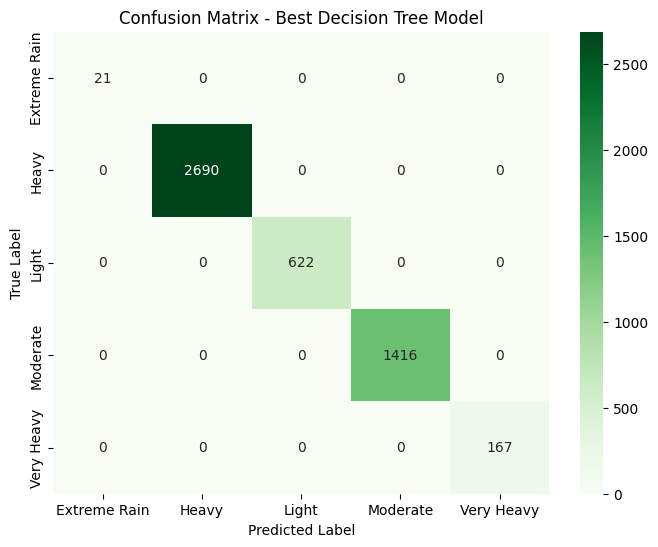

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_best, annot=True, fmt='d', cmap='Greens',
            xticklabels=target_names,
            yticklabels=target_names)
plt.title('Confusion Matrix - Best Decision Tree Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#Linear Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


# Load the dataset

In [ ]:
file_path = 'Rain.csv'
df = pd.read_csv(file_path)

# Inspect the dataset (optional)
print(df.head())

   temperature_2m_max  temperature_2m_min  temperature_2m_mean  \
0                29.6                20.8                 25.4   
1                29.6                22.6                 25.4   
2                29.1                21.9                 24.9   
3                28.4                19.9                 24.2   
4                27.7                19.5                 23.6   

   apparent_temperature_max  apparent_temperature_min  \
0                      35.5                      23.7   
1                      35.2                      26.7   
2                      36.2                      26.2   
3                      33.1                      22.6   
4                      30.7                      22.3   

   apparent_temperature_mean  shortwave_radiation_sum  rain_sum  \
0                       29.8                    20.67       0.1   
1                       30.2                    17.50       0.9   
2                       29.9                    16.58      

# Split into features (X) and target (y)

In [ ]:
X = rain.drop('rain_sum', axis=1)
y = rain['rain_sum']

# Standardize the features

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the Linear Regression model

In [ ]:
model = LinearRegression()

# Define KFold cross-validation

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Get cross-validated predictions

In [ ]:
y_pred = cross_val_predict(model, X_scaled, y, cv=kf)

# Mean Squared Error

In [ ]:
mse = mean_squared_error(y, y_pred)

In [ ]:
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 11.992285849250992


In [ ]:
abe = mean_absolute_error(y, y_pred)

In [ ]:
print(f"Absolute Mean Error: {abe}")

Absolute Mean Error: 2.037373953100969


In [ ]:
r_squared = r2_score(y, y_pred)

In [ ]:
print(f"R squared Error: {r_squared}")

R squared Error: 0.8914673186927744


In [ ]:
# Generate and display the classification report
report = classification_report(y, y_pred, target_names=target_names)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

Extreme Rain       1.00      0.38      0.55        21
       Heavy       0.90      0.95      0.93      2690
       Light       0.92      0.92      0.92       622
    Moderate       0.88      0.86      0.87      1416
  Very Heavy       0.73      0.21      0.33       167

    accuracy                           0.90      4916
   macro avg       0.89      0.67      0.72      4916
weighted avg       0.89      0.90      0.89      4916



# Ridge Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold

# 1. Load the 'rain' dataset

In [ ]:
file_path = 'Rain.csv'
df = pd.read_csv(file_path)

# Inspect the dataset (optional)
print(df.head())

   temperature_2m_max  temperature_2m_min  temperature_2m_mean  \
0                29.6                20.8                 25.4   
1                29.6                22.6                 25.4   
2                29.1                21.9                 24.9   
3                28.4                19.9                 24.2   
4                27.7                19.5                 23.6   

   apparent_temperature_max  apparent_temperature_min  \
0                      35.5                      23.7   
1                      35.2                      26.7   
2                      36.2                      26.2   
3                      33.1                      22.6   
4                      30.7                      22.3   

   apparent_temperature_mean  shortwave_radiation_sum  rain_sum  \
0                       29.8                    20.67       0.1   
1                       30.2                    17.50       0.9   
2                       29.9                    16.58      

# 2. Data Preprocessing

In [ ]:
# 2.1 Handle Missing Values (for simplicity, drop rows with missing values)
rain = df.dropna()

# 2.2 Encode Categorical Variables
categorical_cols = rain.select_dtypes(include=['object']).columns
le = LabelEncoder()

# Encode all categorical columns
for col in categorical_cols:
    rain[col] = le.fit_transform(rain[col])

# 2.3 Define Features and Target
# Replace 'target' with the actual target column name in your dataset
X = rain.drop('rain_sum', axis=1)
y = rain['rain_sum']

# 3. Implementing Ridge Regression with Cross-Validation

In [ ]:
# 3.1 Define the number of folds
k_folds = 5

# 3.2 Initialize StratifiedKFold
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# 3.3 Create a Pipeline
pipeline = make_pipeline(
    StandardScaler(),
    Ridge(alpha=1.0)  # You can adjust alpha as needed
)



In [ ]:
# 3.4 Perform Cross-Validated Predictions
y_pred = cross_val_predict(pipeline, X, y, cv=kf)

# Mean Squared Error (MSE)

In [ ]:
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y, y_pred)
print(f"Mean Absolute Error: {mae}")

# R² Score
r2 = r2_score(y, y_pred)
print(f"R² Score: {r2}")

Mean Squared Error: 14.624206196149695
Mean Absolute Error: 2.3517041411604387
R² Score: 0.8676478921191657


# Lasso Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
file_path = 'Rain.csv'
df = pd.read_csv(file_path)

# Inspect the dataset (optional)
print(df.head())

   temperature_2m_max  temperature_2m_min  temperature_2m_mean  \
0                29.6                20.8                 25.4   
1                29.6                22.6                 25.4   
2                29.1                21.9                 24.9   
3                28.4                19.9                 24.2   
4                27.7                19.5                 23.6   

   apparent_temperature_max  apparent_temperature_min  \
0                      35.5                      23.7   
1                      35.2                      26.7   
2                      36.2                      26.2   
3                      33.1                      22.6   
4                      30.7                      22.3   

   apparent_temperature_mean  shortwave_radiation_sum  rain_sum  \
0                       29.8                    20.67       0.1   
1                       30.2                    17.50       0.9   
2                       29.9                    16.58      

In [ ]:
X = rain.drop('rain_sum', axis=1)
y = rain['rain_sum']

# Define the number of folds for cross-validation

In [ ]:
k_folds = 5

In [ ]:
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

In [ ]:
pipeline = make_pipeline(
    StandardScaler(),          # Standardizes the features
    Lasso(alpha=1.0)           # Lasso regression model (alpha is the regularization strength)
)


In [ ]:
y_pred = cross_val_predict(pipeline, X, y, cv=kf)

# Mean Squared Error (MSE)

In [ ]:
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y, y_pred)
print(f"Mean Absolute Error: {mae}")

# R² Score (Coefficient of Determination)
r2 = r2_score(y, y_pred)
print(f"R² Score: {r2}")

Mean Squared Error: 19.718598097980077
Mean Absolute Error: 2.4019901319959107
R² Score: 0.8215425857842604


# Polynomial Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import make_pipeline


In [ ]:
file_path = 'Rain.csv'
df = pd.read_csv(file_path)

# Inspect the dataset (optional)
print(df.head())

   temperature_2m_max  temperature_2m_min  temperature_2m_mean  \
0                29.6                20.8                 25.4   
1                29.6                22.6                 25.4   
2                29.1                21.9                 24.9   
3                28.4                19.9                 24.2   
4                27.7                19.5                 23.6   

   apparent_temperature_max  apparent_temperature_min  \
0                      35.5                      23.7   
1                      35.2                      26.7   
2                      36.2                      26.2   
3                      33.1                      22.6   
4                      30.7                      22.3   

   apparent_temperature_mean  shortwave_radiation_sum  rain_sum  \
0                       29.8                    20.67       0.1   
1                       30.2                    17.50       0.9   
2                       29.9                    16.58      

In [ ]:
X = rain.drop('rain_sum', axis=1)
y = rain['rain_sum']

# Define the number of folds for cross-validation

In [ ]:
k_folds = 5

In [ ]:
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

In [ ]:
degree = 2

In [ ]:
pipeline = make_pipeline(
    PolynomialFeatures(degree),  # Generates polynomial features
    StandardScaler(),            # Standardizes the features
    LinearRegression()           # Linear regression model
)

In [ ]:
y_pred = cross_val_predict(pipeline, X, y, cv=kf)

# 4. Compute Regression Metrics

In [ ]:
# Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y, y_pred)
print(f"Mean Absolute Error: {mae}")

# R² Score (Coefficient of Determination)
r2 = r2_score(y, y_pred)
print(f"R² Score: {r2}")

Mean Squared Error: 1.0846421341519934e-17
Mean Absolute Error: 2.1438368267530126e-09
R² Score: 1.0


# Bayesian Linear Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
file_path = 'Rain.csv'
df = pd.read_csv(file_path)

# Inspect the dataset (optional)
print(df.head())

   temperature_2m_max  temperature_2m_min  temperature_2m_mean  \
0                29.6                20.8                 25.4   
1                29.6                22.6                 25.4   
2                29.1                21.9                 24.9   
3                28.4                19.9                 24.2   
4                27.7                19.5                 23.6   

   apparent_temperature_max  apparent_temperature_min  \
0                      35.5                      23.7   
1                      35.2                      26.7   
2                      36.2                      26.2   
3                      33.1                      22.6   
4                      30.7                      22.3   

   apparent_temperature_mean  shortwave_radiation_sum  rain_sum  \
0                       29.8                    20.67       0.1   
1                       30.2                    17.50       0.9   
2                       29.9                    16.58      

In [ ]:
X = rain.drop('rain_sum', axis=1)
y = rain['rain_sum']

#  Define the number of folds for cross-validation

In [ ]:
k_folds = 5

In [ ]:
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

In [ ]:
pipeline = make_pipeline(
    StandardScaler(),         # Standardizes the features
    BayesianRidge()           # Bayesian Linear Regression model
)

In [ ]:
y_pred = cross_val_predict(pipeline, X, y, cv=kf)

#  Compute Regression Metrics

In [ ]:
# Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y, y_pred)
print(f"Mean Absolute Error: {mae}")

# R² Score (Coefficient of Determination)
r2 = r2_score(y, y_pred)
print(f"R² Score: {r2}")

Mean Squared Error: 14.62529486033367
Mean Absolute Error: 2.351484752848708
R² Score: 0.8676380394818608


# Check validation using K-NN algoritham

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
real_dataset = pd.read_csv('Real_Value.csv')
sampling_dataset = pd.read_csv('Sample_value.csv')

In [ ]:
real_dataset = real_dataset.dropna()
sampling_dataset = sampling_dataset.dropna()

In [ ]:
X_real = real_dataset.drop('rain_status', axis=1)  # Features
y_real = real_dataset['rain_status']

In [ ]:
X_sampling = sampling_dataset.drop('rain_status', axis=1)
y_sampling = sampling_dataset['rain_status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_real, y_real, test_size=0.2, random_state=42)


In [ ]:
k = 5  # You can adjust k based on your requirements
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_sampling = knn.predict(X_sampling)

In [ ]:
accuracy = accuracy_score(y_sampling, y_pred_sampling)
print(f"Accuracy Rate: {accuracy * 100:.2f}%")

Accuracy Rate: 75.00%


In [ ]:
conf_matrix = confusion_matrix(y_sampling, y_pred_sampling)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[83  0  8  1]
 [ 1 17  6  0]
 [22  2 23  0]
 [ 2  0  0  3]]


In [ ]:
correction_ratios = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
correction_ratio = correction_ratios.mean()
print(f"Correction Ratio: {correction_ratio:.2f}")

Correction Ratio: 0.67


# Check validation using Decision Tree algoritham

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
real_dataset = pd.read_csv('Real_Value.csv')
sampling_dataset = pd.read_csv('Sample_value.csv')

In [ ]:
X_real = real_dataset.drop('rain_status', axis=1)
y_real = real_dataset['rain_status']

X_sampling = sampling_dataset.drop('rain_status', axis=1)
y_sampling = sampling_dataset['rain_status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_real, y_real, test_size=0.2, random_state=42)


In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_sampling = dt_model.predict(X_sampling)


In [ ]:
accuracy = accuracy_score(y_sampling, y_pred_sampling)
print(f"Accuracy Rate: {accuracy * 100:.2f}%")

Accuracy Rate: 100.00%


In [ ]:
conf_matrix = confusion_matrix(y_sampling, y_pred_sampling)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[92  0  0  0]
 [ 0 24  0  0]
 [ 0  0 47  0]
 [ 0  0  0  5]]


In [ ]:
correction_ratios = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
correction_ratio = correction_ratios.mean()
print(f"Correction Ratio: {correction_ratio:.2f}")

Correction Ratio: 1.00


# Check validation using Polinomial Regression Algoritham

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
real_dataset = pd.read_csv('Real_Value.csv')
sampling_dataset = pd.read_csv('Sample_value.csv')

In [ ]:
X_real = real_dataset.drop('rain_sum', axis=1)
y_real = real_dataset['rain_sum']

X_sampling = sampling_dataset.drop('rain_sum', axis=1)
y_sampling = sampling_dataset['rain_sum']

In [ ]:
string_cols = X_real.select_dtypes(include=['object']).columns

In [ ]:
label_encoders = {}
for col in string_cols:
    label_encoders[col] = LabelEncoder()
    # Fit and transform on both datasets to ensure consistent encoding
    X_real[col] = label_encoders[col].fit_transform(X_real[col])
    X_sampling[col] = label_encoders[col].transform(X_sampling[col])

In [ ]:
degree = 2  # You can adjust the degree of the polynomial as needed
poly = PolynomialFeatures(degree=degree)

# Transform the features to polynomial features
X_real_poly = poly.fit_transform(X_real)
X_sampling_poly = poly.transform(X_sampling)

In [ ]:
poly_model = LinearRegression()
poly_model.fit(X_real_poly, y_real)

LinearRegression()

In [ ]:
y_pred_sampling = poly_model.predict(X_sampling_poly)


In [ ]:
mse = mean_squared_error(y_sampling, y_pred_sampling)
r2 = r2_score(y_sampling, y_pred_sampling)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error (MSE): 0.00
R^2 Score: 1.00


In [ ]:
threshold = 5  # You can define an acceptable error margin
correct_predictions = np.abs(y_sampling - y_pred_sampling) <= threshold
correction_ratio = np.mean(correct_predictions)
print(f"Correction Ratio (within ±{threshold}): {correction_ratio:.2f}")

Correction Ratio (within ±5): 1.00
